### <center>  1. Libraries

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

### <center>2.  Data

#### 2.0. Data Understanding

The dataset includes sample data of 1000 startup companies operating cost and their profit.
Includes
* R&D Spend 
* Administration 
* Marketing Spend 
* State 
* Profit 
>Data source [Kaggle](https://www.kaggle.com/datasets/rupakroy/1000-companies-profit/download?datasetVersionNumber=1)

##### 2.0.1 load dataset

In [3]:
# Load the data file
file_path = ("./Data/1000_Companies.csv")
df = pd.read_csv(file_path,index_col = None)

##### 2.0.2 preview dataset

In [4]:
# Preview the data
df.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51


##### 2.0.3 shape of our data before cleaning

In [5]:
# Shape of the dataset
print(f"The dataframe has {df.shape[0]} columns and {df.shape[1]} rows")

The dataframe has 1000 columns and 5 rows


##### 2.0.4 data types

In [6]:
# datatypes in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


>the data set contains 4 numerical columns and one categorical columns

##### 2.0.5 Descriptive Analysis

In [7]:
numeric_features = ['R&D Spend', 'Marketing Spend', 'Administration', 'Profit']
df[numeric_features + ['Profit']].describe()

,R&D Spend,Marketing Spend,Administration,Profit,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,226205.058419,122963.897612,119546.164656,119546.164656
std,46537.567891,91578.393542,12613.927535,42888.633848,42888.633848
min,0.000000,0.000000,51283.140000,14681.400000,14681.400000
25%,43084.500000,150969.584600,116640.684850,85943.198543,85943.198543
50%,79936.000000,224517.887350,122421.612150,117641.466300,117641.466300
75%,124565.500000,308189.808525,129139.118000,155577.107425,155577.107425
max,165349.200000,471784.100000,321652.140000,476485.430000,476485.430000


###### R&D Spend:
* The mean R&D spend is approximately 81,669.
* The standard deviation is around 46,538, indicating a significant variation in R&D expenditures among the companies.
* The minimum value is 0, meaning that some companies did not allocate any funds to R&D.
* The maximum value is 165,349.2, indicating the highest R&D spend among the companies.

###### Marketing Spend:
* The mean marketing spend is approximately 226,205.
* The standard deviation is about 91,578, indicating a wide range of marketing expenditures.
* The minimum value is 0, meaning that some companies did not invest in marketing.
* The maximum value is 471,784.1, indicating the highest marketing spend among the companies.

###### Administration:
* The mean administration cost is approximately 122,964.
* The standard deviation is relatively low at 12,614, suggesting that the administration costs are more consistent compared to R&D and marketing spends.
* The minimum value is 51,283.14, indicating the lowest administration cost among the companies.
* The maximum value is 321,652.14, indicating the highest administration cost among the companies.

###### Profit:
* The mean profit is approximately 119,546.
* The standard deviation is around 42,889, indicating a significant variation in profitability.
* The minimum profit recorded is 14,681.4, indicating that some companies experienced losses.
* The maximum profit recorded is 476,485.43, indicating the highest profitability among the companies.

#### 2.1. Data Cleaning
The cleaning process involved the following:
* irrelevant data
* duplicates
* structural errors
* missing data
* filter out outliers
* data validation

##### 2.1.0 duplicates

In [9]:
# Check to confirm before dropping duplicates
before_len = len(set(df.duplicated()))
print(f"Before dropping {before_len}")

# Dropping the duplicated row
df = df.drop_duplicates(keep='last')

# Check to confirm after dropping duplicates
print('After dropping',len(set(df.duplicated())))


Before dropping 1
After dropping 1


> the dataset had only one duplicate and is droped.

##### 2.1.1 missing data

In [10]:
# Check for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

> data had no missing values

### 3. EDA

In [11]:
data = df.copy(deep=True)

##### 3.1. Distribution of  Target

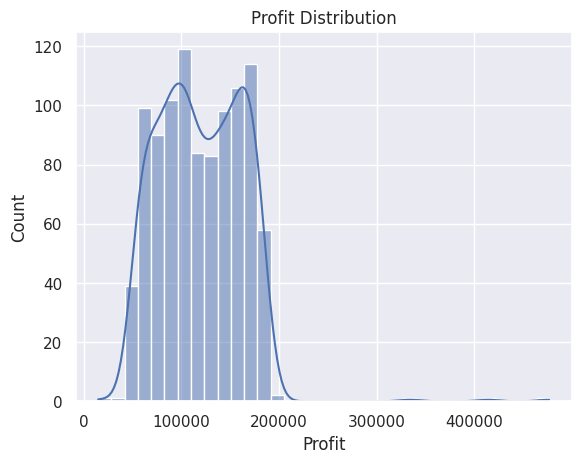

In [12]:
# Plot target column
sns.set(style='darkgrid')
sns.histplot(data['Profit'], kde=True)
plt.title('Profit Distribution')
plt.show()


Traget column is nornaly distributed

#### 3.2. Correlation Analysis

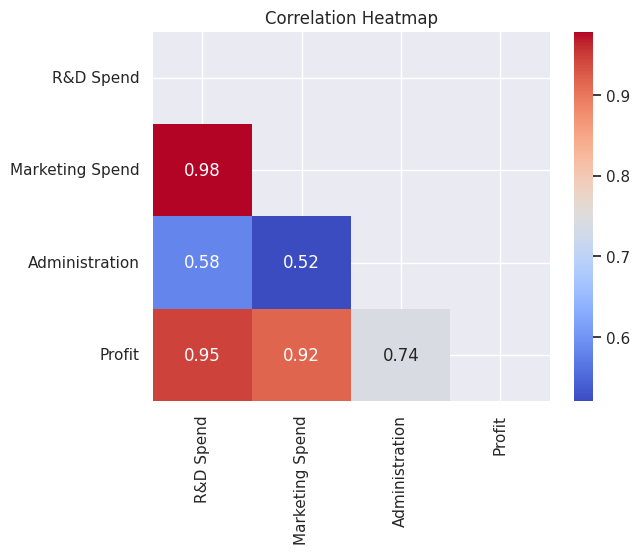

In [13]:
# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot correlation heatmap with triane shape
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### 3.3. State-wise Profit Comparison

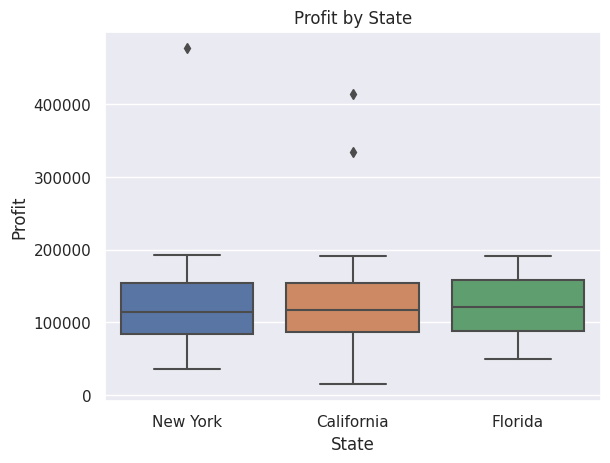

In [14]:
# Set plot
sns.set(style='darkgrid')
sns.boxplot(x='State', y='Profit', data=df)
plt.title('Profit by State')
plt.show()


##### 3.4. Feature: R&D Spend - Relationship with Profit.

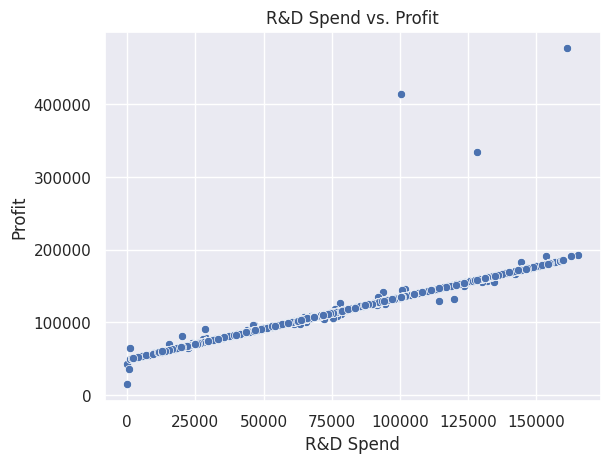

In [15]:
# Set plot
sns.set(style='darkgrid')
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('R&D Spend vs. Profit')
plt.show()


### 4. Feature Engineering

* Total Expenses.

In [16]:
# Create a new feature called Total Expenses.
data['Total Expenses'] = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']

# Profit margin as the ratio of Profit to Total Expenses.
data['Profit Margin'] = data['Profit'] / data['Total Expenses']

### 5. Modeling 

In [17]:
# Select the features and target variable
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
# Convert categorical variable 'State' to numerical using one-hot encoding
# X = pd.get_dummies(X, drop_first=True)

# Target
y = data['Profit']

In [18]:
# Split data 70%-20% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 849 rows
Test Set: 150 rows


#### Regression Analysis

In [19]:
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     6284.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        18:26:58   Log-Likelihood:                -10578.
No. Observations:                 999   AIC:                         2.116e+04
Df Residuals:                     995   BIC:                         2.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7.016e+04   3968.542    -

#### Model Tuning

In [20]:
# Create a pipeline with polynomial features and linear regression
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the hyperparameters to tune
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],  # Try different polynomial degrees
    'linearregression__fit_intercept': [True, False]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Best Hyperparameters: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1}
Mean Squared Error: 25153955.7939808
Root Mean Squared Error: 5015.371949714278
R-squared Score: 0.9833376089218933


>* Best Hyperparameters: The reported best hyperparameters for the model are linearregression__fit_intercept=True and polynomialfeatures__degree=1. This suggests that the linear regression model includes an intercept term and does not involve polynomial features (i.e., only considers linear relationships).

### 6. Model Evaluation

In [21]:
# Create a pipeline with PolynomialFeatures and LinearRegression
tuned_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression(fit_intercept=True))
tuned_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [22]:
# Make predictions on the test set using the best model
y_pred = tuned_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Squared Error: 25153955.7939808
Root Mean Squared Error: 5015.371949714278
R-squared Score: 0.9833376089218933


* **Mean Squared Error (MSE):** The MSE value of 25153955.7939808 indicates the average squared difference between the predicted and actual values of the dependent variable (Profit).

* **Root Mean Squared Error (RMSE):** The RMSE value of 5015.371949714278 is the square root of the MSE and provides a measure of the average magnitude of the prediction errors in the original scale of the dependent variable. 

* **R-squared Score:** The R-squared score of 0.9833376089218933 indicates that approximately 98.33% of the variance in the dependent variable (Profit) is explained by the independent variables (R&D Spend, Administration, Marketing Spend, and State). This high R-squared value suggests that the model captures a significant portion of the underlying relationships between the features and the target variable.